<a href="https://colab.research.google.com/github/iciromaco/RadiShLab/blob/master/S1_%E5%8E%9F%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E3%82%B7%E3%83%AB%E3%82%A8%E3%83%83%E3%83%88%E7%94%BB%E5%83%8F%E3%81%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 前提
Google Colaboratory での実行を想定しています。
- Google Drive に [RadishLab](https://github.com/iciromaco/RadiShLab) フォルダをコピーしてください。

ローカルPCで実行させる場合はパスが出てくる部分などを適当に書き換えてください。

- (Colab) と書かれている部分は Google Colaboratory でのみ有効なコードです。 

## Google ドライブに接続（Colab)
次のセルを実行し、表示されたリンク先にアクセスし、接続を許可します。表示されたコードを枠内にペーストしてEnterすると、左のエリアに drive というフォルダが現れます。

このフォルダ内の My Drive は自分の Google Drive そのものです。



In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/RadishLab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# RadishLabのライブラリのインポート


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rdlib4 as rd

# (1) フォルダ内の画像の収集

In [3]:
# サンプルの画像フォルダのパス (Colab)
DATAFOLDER = '/content/drive/My Drive/RadishLab/RDSamples'
# ファイル名の確認
!ls /content/drive/My\ Drive/RadishLab/RDSamples

17daruma5o03_l.jpg  17horyot2o07_l.jpg	17nezumi2o02_l.jpg  cropped.jpg
17heians1o04_l.jpg  17karami1o09_l.jpg	17ofukur1o07_l.jpg  RDSamplesTHUM.PNG
17horyot1o06_l.jpg  17makoto2o06_l.jpg	17tukasa1o02_l.jpg  Sample001.ipynb


# サムネイル画像の作成と確認

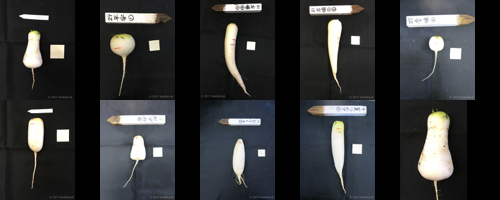

In [4]:
rd.makethumbnail(DATAFOLDER)

# (2) 画像の表示

collectimages(*PATH*)で、*PATH*で指定したフォルダ内の画像を opencv 形式（=numpy配列）のリストとして収集することができます。次のセルではその０番目,３番目，９番目を横並びで表示してみています。

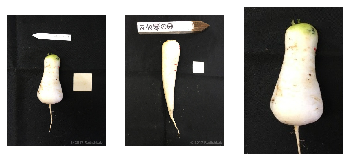

In [11]:
imgs = rd.collectimages(DATAFOLDER)
rd.plotimg(imgs[0],131)
rd.plotimg(imgs[3],132)
rd.plotimg(imgs[9],133)

描画関数 plogimg() は matplotlib の imshow() で描画しており、描画サイズは自動的に拡大縮小されてしまいます。

９番目（10枚目）の画像は０番目から切り出した画像なので、実際には小さいのに大きく表示されてしまっています。

同じ縮尺で複数の画像を並べて比較したい場合のために、mkparaimage(画像1,画像2）という、２枚並べた画像を作って表示します。


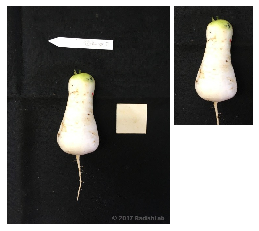

In [12]:
rd.plotimg(rd.mkparaimage([imgs[0],imgs[9]]))

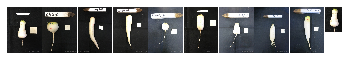

In [13]:
rd.plotimg(rd.mkparaimage(imgs))

jupyter notebook 内で imshow() を実行すると、デフォルトの横幅が固定であるため、上の図のように小さく表示されてしまいます。

大きく表示したい場合は、figsize と dpi を具体的に指定してください。

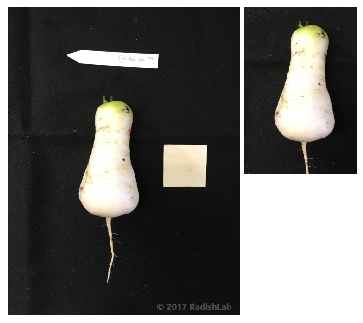

In [52]:
plt.figure(figsize=(6,6),dpi=75) # 描画範囲を横6x75,縦6x75に指定
rd.plotimg(rd.mkparaimage([imgs[0],imgs[9]])) # 第２引数を省略すると 111

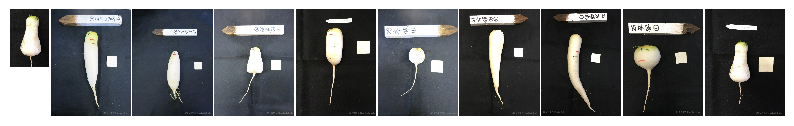

In [40]:
plt.figure(figsize=(10,2),dpi=100)
rd.plotimg(rd.mkparaimage(imgs[::-1]))

# (4) マージンをつける
**makemargin(img,mr=倍率)** で画像の周りに余白部分を追加することができます。倍率は、原画像のサイズを１とした場合の、余白を追加したあとの画像のサイズです。

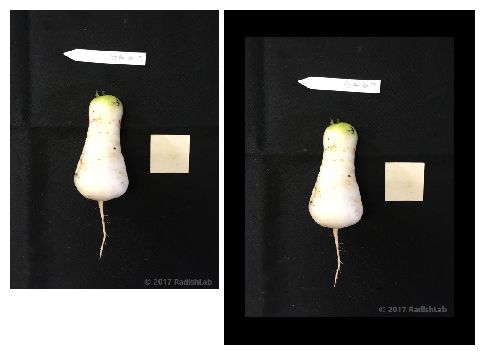

In [44]:
 img = imgs[0]
 img12 = rd.makemargin(img,mr=1.2) # 画像サイズが1.2倍になるようにマージンをつける
 plt.figure(figsize=(6,8),dpi=100)
 rd.plotimg(rd.mkparaimage2(img,img12)) # ２枚だけ並べて表示